In [15]:
import os
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy import signal
from vbi.models.cpp.wc import WC_ode

In [16]:
def plot_ts_pxx_wc(data, par, ax, **kwargs):

    nn = par['weights'].shape[0]
    tspan = data['t']
    E = data['x'][:nn, :]
    I = data['x'][nn:, :]
    ax[0].plot(tspan, E.T, label='E', color="r", **kwargs)
    ax[0].plot(tspan, I.T, label='I', color="b", **kwargs)

    y = E - np.mean(E, axis=1, keepdims=True)
    freq, pxx = signal.welch(y, 1000/par['dt'], nperseg=E.shape[1])
    ax[1].plot(freq, pxx.T, **kwargs)
    ax[1].set_xlim(0, 50)
    ax[1].set_xlabel("frequency [Hz]")
    ax[0].set_xlabel("time [ms]")
    ax[0].set_ylabel("activity")
    ax[1].set_ylabel("PSD")
    # show 10 last % of time series
    t_end = par['t_end']
    # ax[0].set_xlim(t_end * 0.9, t_end)
    ax[0].set_xlim(0,200)
    ax[0].margins(x=0)

    plt.tight_layout()


In [17]:
seed = 2
np.random.seed(seed)
torch.manual_seed(seed)

In [18]:
LABESSIZE = 12
plt.rcParams['axes.labelsize'] = LABESSIZE
plt.rcParams['xtick.labelsize'] = LABESSIZE
plt.rcParams['ytick.labelsize'] = LABESSIZE

In [19]:
nn = 6
SC = nx.to_numpy_array(nx.complete_graph(nn))

In [20]:
par = {
    "dt": 0.05,
    "weights": SC,
    "output": "output",
    "t_end": 1000.0,
    "t_cut": 0.0,
    "method": "heun",
    "seed": 2,
    "noise_seed": True,
}

Done!


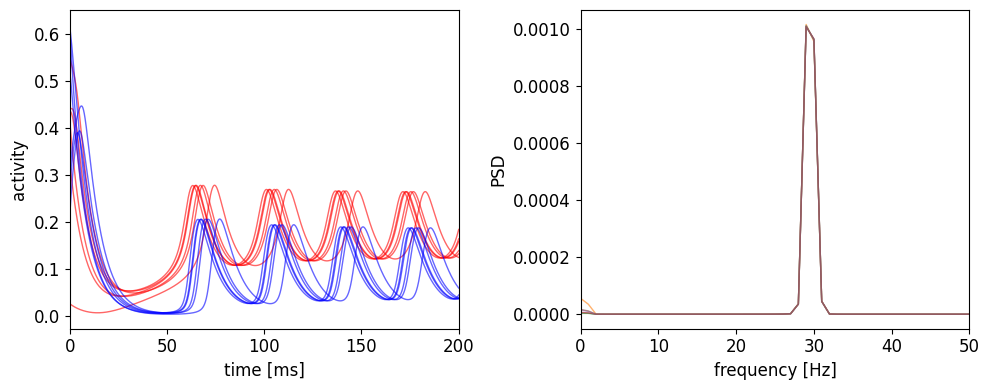

In [21]:
obj = WC_ode(par)
# print(obj)
data = obj.run()
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plot_ts_pxx_wc(data, par, ax, alpha=0.6, lw=1)
os.makedirs("output", exist_ok=True)
plt.savefig("output/wc_ode_cpp.png")
print("Done!")